In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 4000
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision=5)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'E:\learn st new\Credit score\loan_data_clean.csv', low_memory= False)
df.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_pct,loan_issue_m,cr_line_issue_m,earliest_cr_year,total_installment,pymnt_blance_rate
0,1077501,5000,36,10.650,162.870,B,10,RENT,24000.000,Verified,2011-12-01,0,credit_card,27.650,0.000,1985-01-01,1.000,0.000,3.000,0.000,13648,83.700,9.000,f,0.000,5831.780,5000.000,861.070,0.000,0.000,0.000,2015-01-01,171.620,2016-01-01,0.000,1,0.000,0.000,48.000,371.000,1985,6487.764,23.201
1,1077430,2500,60,15.270,59.830,C,0,RENT,30000.000,Source Verified,2011-12-01,1,car,1.000,0.000,1999-04-01,5.000,0.000,3.000,0.000,1687,9.400,4.000,f,0.000,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000,1,0.000,0.000,48.000,201.000,1999,4137.962,12.117
2,1077175,2400,36,15.960,84.330,C,10,RENT,12252.000,Not Verified,2011-12-01,0,small_business,8.720,0.000,2001-11-01,2.000,0.000,2.000,0.000,2956,98.500,10.000,f,0.000,3003.650,2400.000,603.650,0.000,0.000,0.000,2014-06-01,649.910,2016-01-01,0.000,1,0.000,0.000,48.000,169.000,2001,3520.406,33.839
3,1076863,10000,36,13.490,339.310,C,10,RENT,49200.000,Source Verified,2011-12-01,0,other,20.000,0.000,1996-02-01,1.000,35.000,10.000,0.000,5598,21.000,37.000,f,0.000,12226.300,10000.000,2209.330,16.970,0.000,0.000,2015-01-01,357.480,2015-01-01,0.000,1,0.000,0.000,48.000,238.000,1996,13862.985,41.500
4,1075358,3000,60,12.690,67.790,B,1,RENT,80000.000,Source Verified,2011-12-01,0,other,17.940,0.000,1996-01-01,0.000,38.000,15.000,0.000,27783,53.900,38.000,f,766.900,3242.170,2233.100,1009.070,0.000,0.000,0.000,2016-01-01,67.790,2016-01-01,0.000,1,0.000,0.000,48.000,239.000,1996,4583.553,9.167


In [3]:
input = df.drop(columns = 'loan_status')
output = df['loan_status']

In [5]:
# Nhóm các biến định lượng
num_col = []
for x in input.dtypes.index:
    if input.dtypes[x] != 'object':
        num_col.append(x)

cat = ['id','term','emp_length','inq_last_6mths','policy_code']
num_col =  [x for x in num_col if x not in cat]
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'delinq_pct',
 'loan_issue_m',
 'cr_line_issue_m',
 'earliest_cr_year',
 'total_installment',
 'pymnt_blance_rate']

<Axes: >

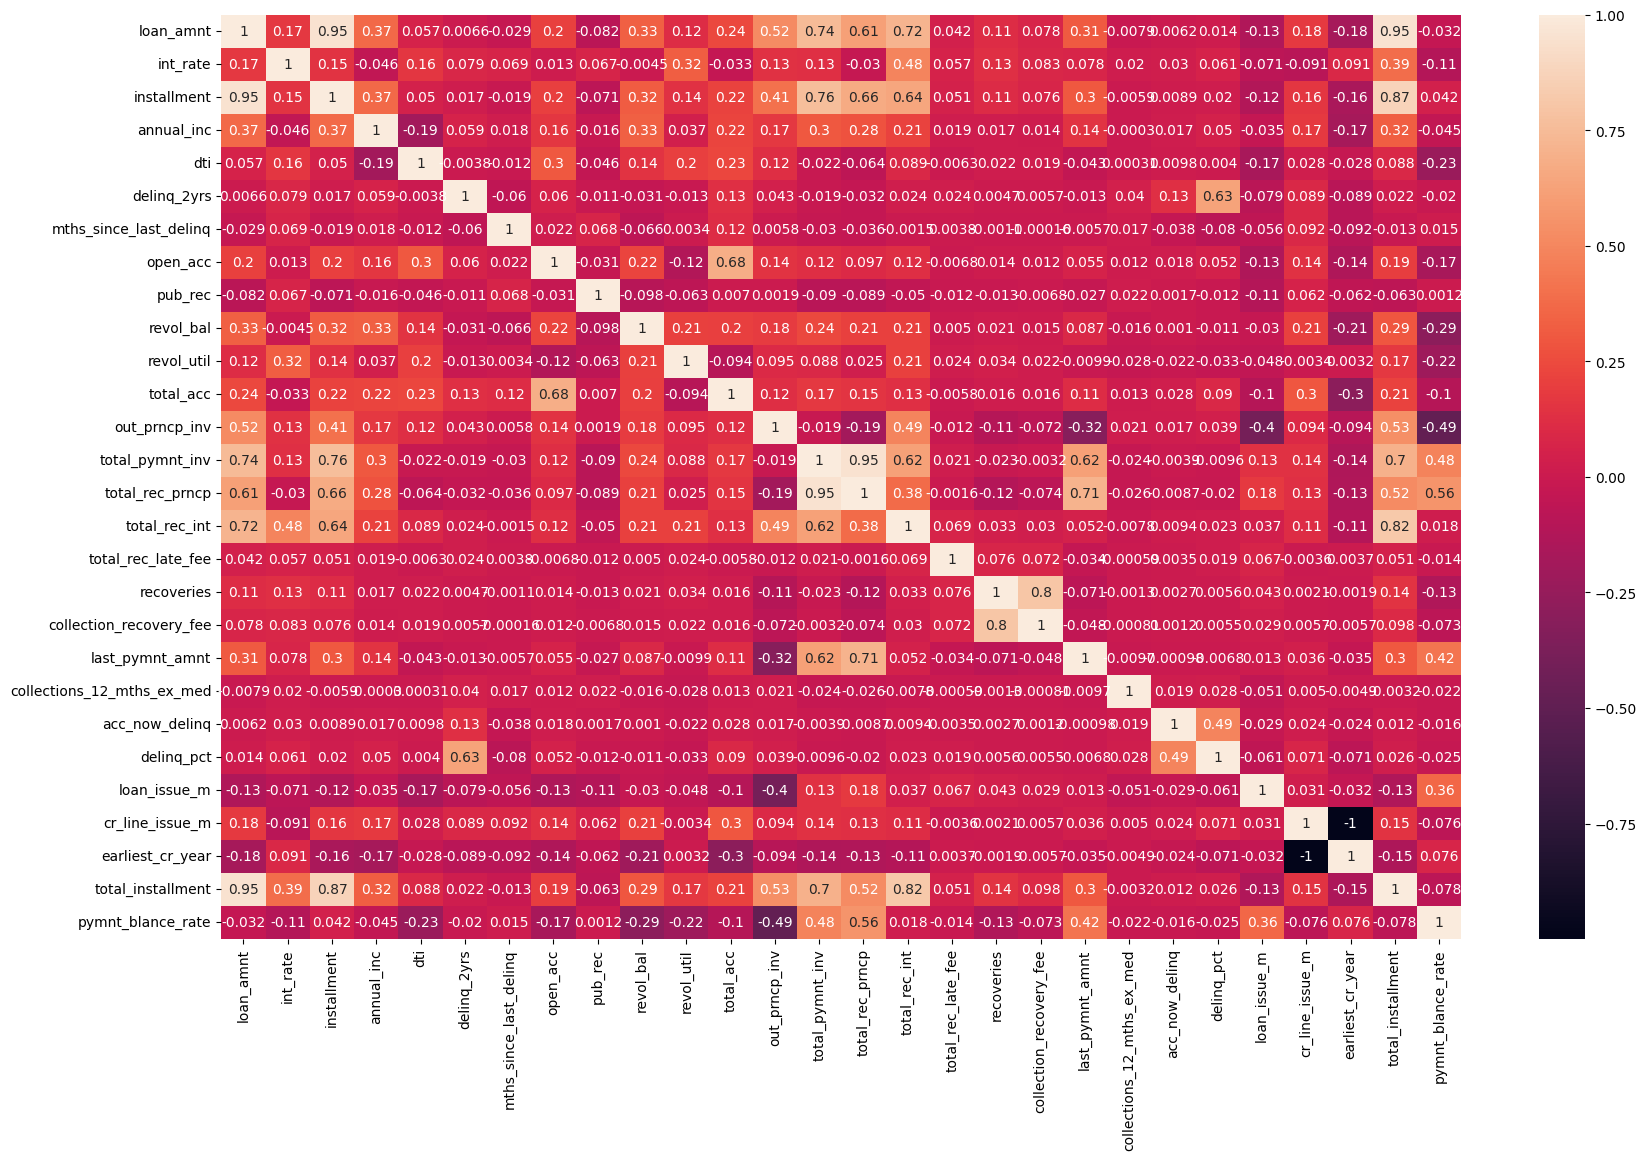

In [6]:
# Biểu đồ ma trận tương quan
plt.figure(figsize = (20,12))
sns.heatmap(data = input[num_col].corr(method = 'pearson'), annot = True)
pass

- loan_amnt, installment, total_rec_int có tương quan cao nhiều columns khác --> nên loại khỏi mô hình
- total_pymnt_inv, total_rec_int có tương quan cao với nhiều biến khác --> nên loại khỏi mô hình
- Tương tự với collection recovery fee --> nên loại khỏi mô hình

In [7]:
input = input.drop(columns = ['loan_amnt', 'installment', 'total_rec_int',
                              'total_pymnt_inv', 'total_rec_int', 'collection_recovery_fee','policy_code'])

### Binning, Weight of Evidence (WoE), Information Value (IV)
---
- Sử dụng WoE nhằm lựa chọn các loại thành phần nên được nhóm
- Sử dụng IV nhằm chọn ra các features tốt nhất cho PD model

In [8]:
output = pd.DataFrame(output)

In [11]:
# Tính WoE và IV cho biến định danh nominal

def woe_discrete(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['no_good'] = df['prop_good'] * df['n_obs']
    df['no_bad'] = (1- df['prop_good']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])

    
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV_total'] = df['IV'].sum()
    # print('===================== Information value of ' +independent_variable+' is '+ str(round(df['IV'].sum(),3))+' ===================')
    return df

#Tạo hàm tính IV và WoE cho biến có dữ liệu liên tục
def woe_continuous(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['no_good'] = df['prop_good'] * df['n_obs']
    df['no_bad'] = (1- df['prop_good']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])

    df = df.sort_values(independent_variable) ## 
    df = df.reset_index(drop=True)
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV_total'] = df['IV'].sum()
    #print('===================== Information value of ' +independent_variable+' is '+ str(round(df['IV'].sum(),3))+' ===================')
    return df

# Vẽ plot
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WOE']
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

In [12]:
input_discrete = ['term','grade','emp_length','home_ownership',
                  'verification_status','purpose','initial_list_status',]
len(input_discrete)

7

In [17]:
input_continuous = ['int_rate','annual_inc','dti', 'delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec',
                    'revol_bal','revol_util','total_acc','out_prncp_inv','total_rec_prncp','total_rec_late_fee', 'recoveries',
                    'last_pymnt_amnt','delinq_pct','loan_issue_m','cr_line_issue_m','earliest_cr_year','acc_now_delinq',
                    'total_installment','pymnt_blance_rate','collections_12_mths_ex_med']
len(input_continuous)

24

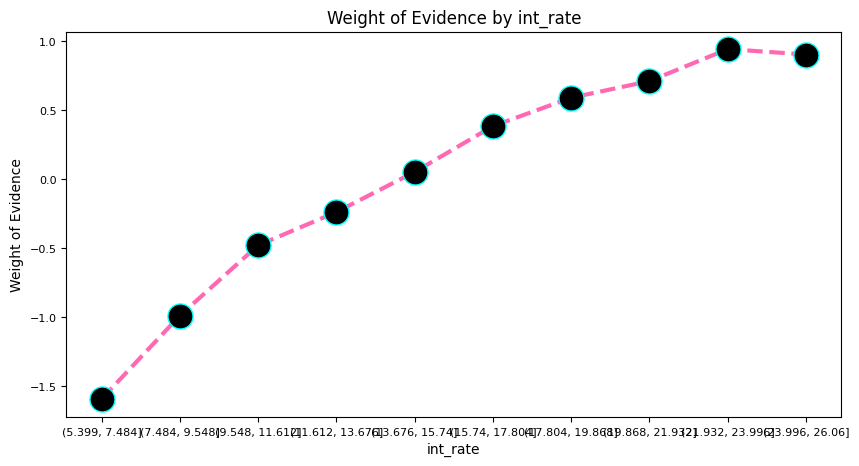

In [21]:
plot_by_woe(woe_continuous(input, 'int_rate', output), rotation_of_x_axis_labels = 0)

In [14]:
# Tính toán WoE và IV của dữ liệu discrete
for i in range(0, len(input_discrete)):
    print(woe_discrete(df, input_discrete[i], output))

   term   n_obs  prop_good   no_good     no_bad  Final_good  Final_bad    WOE  \
0    36  334411      0.111 36957.000 297454.000       0.656      0.735 -0.114   
1    60  126682      0.153 19396.000 107286.000       0.344      0.265  0.261   

     IV  IV_total  
0 0.009     0.030  
1 0.021     0.030  
  grade   n_obs  prop_good   no_good     no_bad  Final_good  Final_bad    WOE  \
0     A   74364      0.043  3204.000  71160.000       0.057      0.176 -1.129   
1     B  135712      0.088 11984.000 123728.000       0.213      0.306 -0.363   
2     C  123876      0.130 16083.000 107793.000       0.285      0.266  0.069   
3     D   75810      0.172 13065.000  62745.000       0.232      0.155  0.402   
4     E   35108      0.215  7562.000  27546.000       0.134      0.068  0.679   
5     F   12978      0.268  3483.000   9495.000       0.062      0.023  0.969   
6     G    3245      0.300   972.000   2273.000       0.017      0.006  1.122   

     IV  IV_total  
0 0.134     0.295  
1 0.034

In [19]:
for i in range(0, len(input_continuous)):
    print(woe_continuous(input, input_continuous[i], output))

           int_rate  n_obs  prop_good   no_good    no_bad  Final_good  \
0    (5.399, 7.484]  27378      0.028   753.000 26625.000       0.013   
1    (7.484, 9.548]  55985      0.049  2756.000 53229.000       0.049   
2   (9.548, 11.612]  58291      0.079  4627.000 53664.000       0.082   
3  (11.612, 13.676]  93625      0.099  9259.000 84366.000       0.164   
4   (13.676, 15.74]  86614      0.128 11087.000 75527.000       0.197   
5   (15.74, 17.804]  59578      0.170 10123.000 49455.000       0.180   
6  (17.804, 19.868]  37428      0.201  7521.000 29907.000       0.133   
7  (19.868, 21.932]  19443      0.221  4297.000 15146.000       0.076   
8  (21.932, 23.996]  14081      0.264  3711.000 10370.000       0.066   
9   (23.996, 26.06]   8670      0.256  2219.000  6451.000       0.039   

   Final_bad    WOE    IV  IV_total  
0      0.066 -1.594 0.084     0.345  
1      0.132 -0.989 0.082     0.345  
2      0.133 -0.479 0.024     0.345  
3      0.208 -0.238 0.011     0.345  
4     

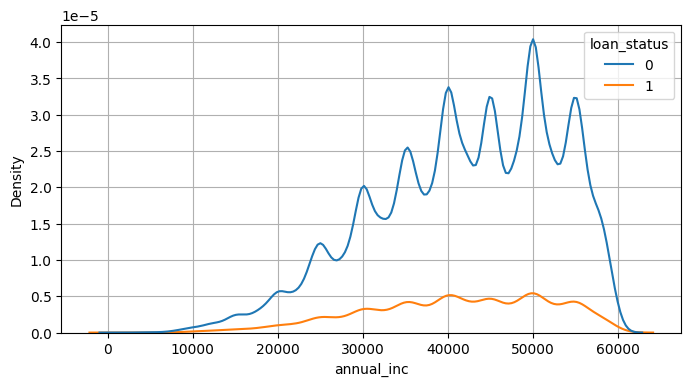

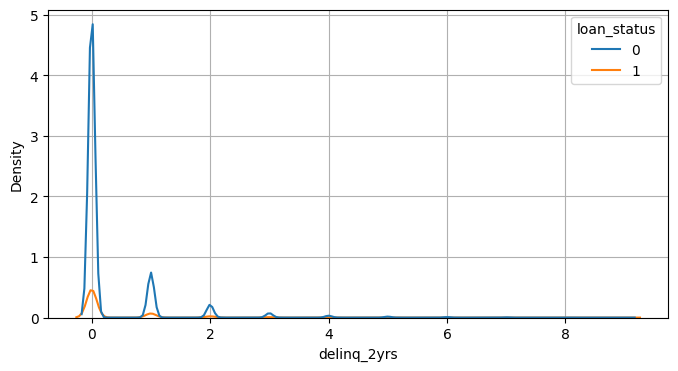

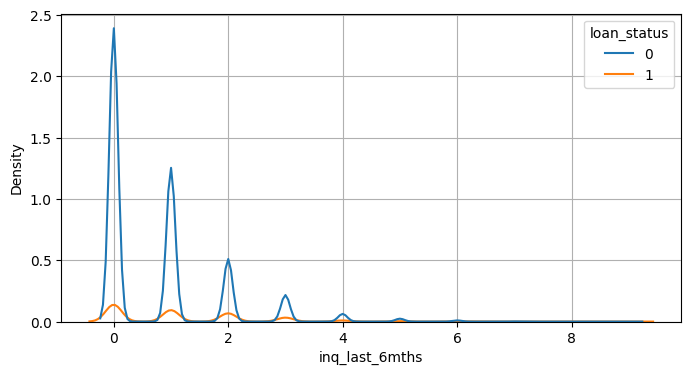

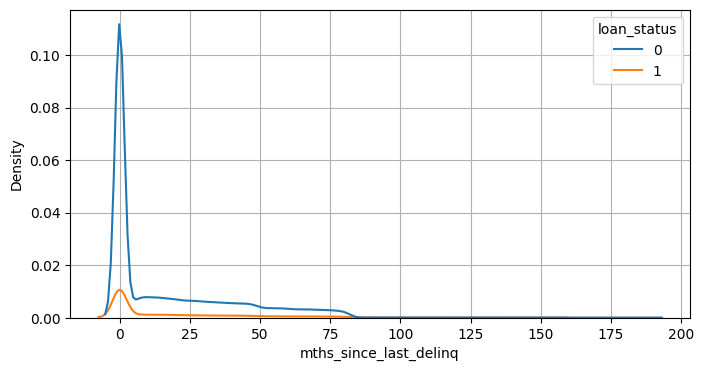

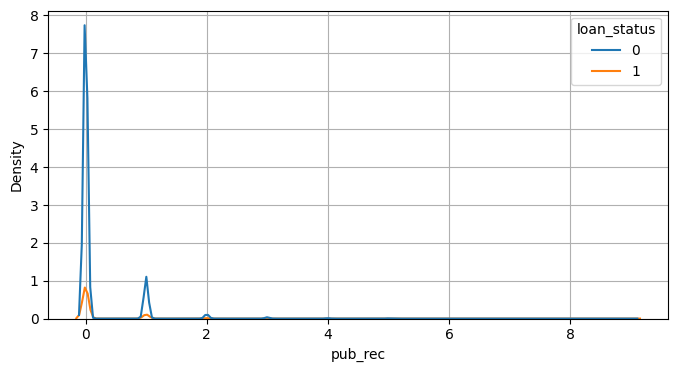

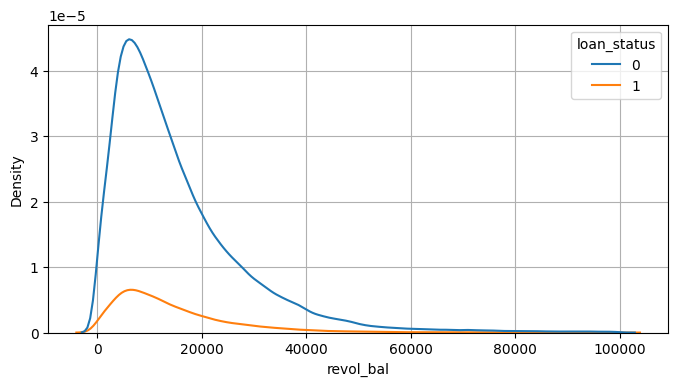

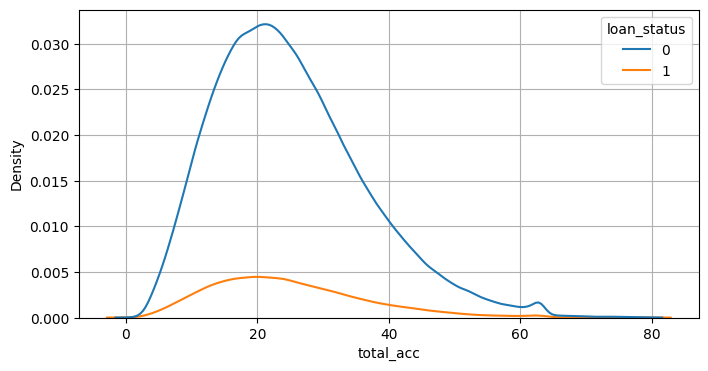

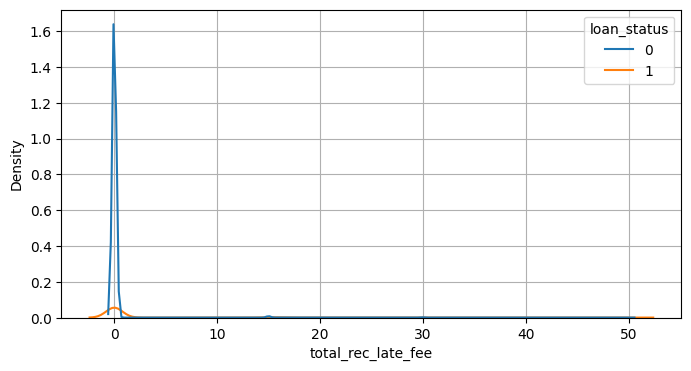

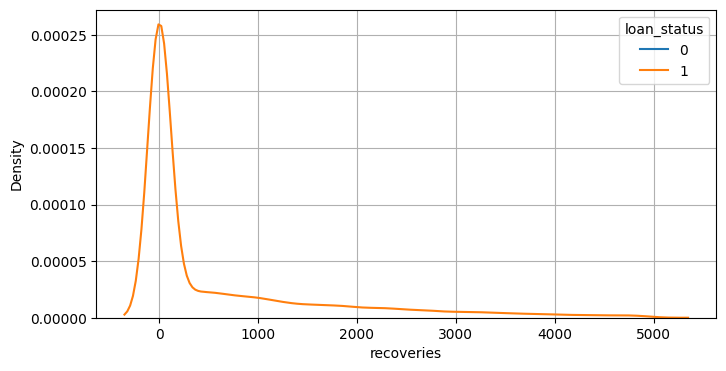

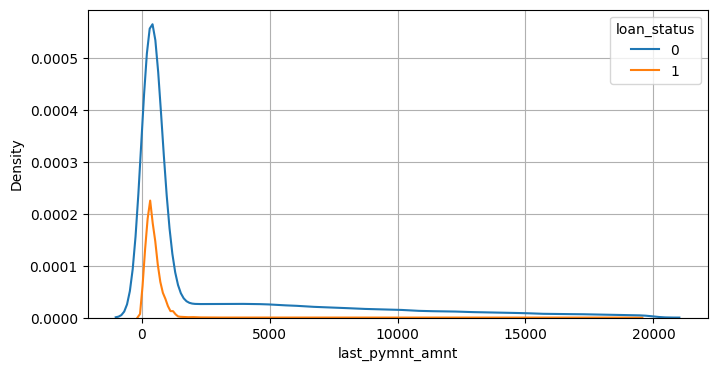

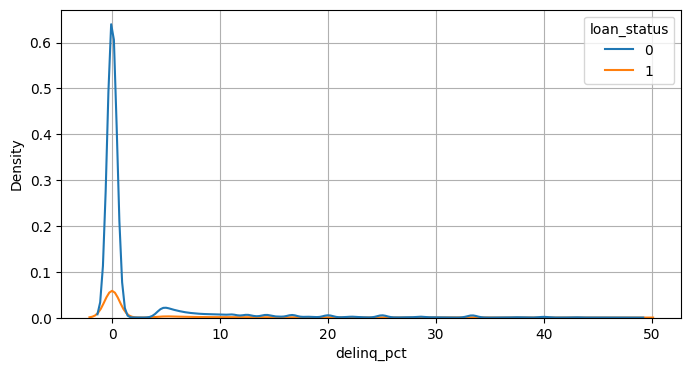

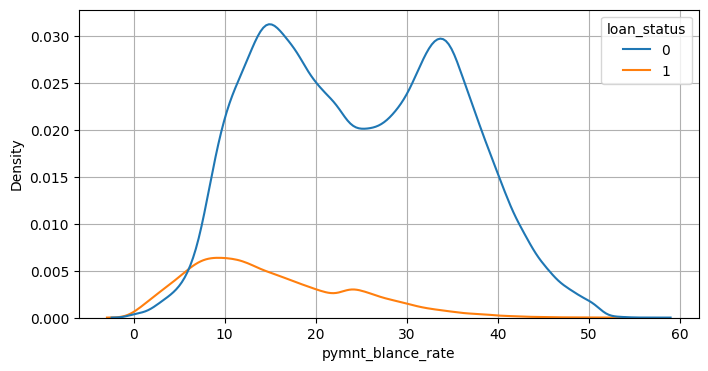

In [49]:
# Plot Histogram
plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['annual_inc']< 60000], x ='annual_inc', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['delinq_2yrs']<10], x ='delinq_2yrs', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['inq_last_6mths']< 10], x ='inq_last_6mths', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df, x ='mths_since_last_delinq', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['pub_rec']< 10], x ='pub_rec', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['revol_bal']<100000], x ='revol_bal', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['total_acc']<80], x ='total_acc', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['total_rec_late_fee']<50], x ='total_rec_late_fee', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['recoveries']<5000], x ='recoveries', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['last_pymnt_amnt']<20000], x ='last_pymnt_amnt', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['delinq_pct']<50], x ='delinq_pct', hue ='loan_status')
plt.grid()

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['pymnt_blance_rate']<60], x ='pymnt_blance_rate', hue ='loan_status')
plt.grid()

pass

In [113]:
df['annual_inc']

0         24000.000
1         30000.000
2         12252.000
3         49200.000
4         80000.000
            ...    
461088   110000.000
461089    78000.000
461090    46000.000
461091    83000.000
461092    46000.000
Name: annual_inc, Length: 461093, dtype: float64

Từ bảng trên, lựa chọn các bins phù hợp:
- Annual Income: sẽ chia làm 3 bins:         <=30000 , (30000, 90000], >=90000
- delinq_2yrs : chia làm 2 bins:               delinq = 1 và 0 và delinq >1
- inq_last_6mths:: chia làm 2 bins:            inq = 0 và >0
- mths_since_last_delinq: chia làm 2 bins:      mths =0 và mths >0
- open_acc: chia làm 5 bins: (2,3,4),(5,6,7), (8,9,10), (10, 14), >=14
- loại pub_rec, revol_bal, earliest_cr_yr khỏi mô hình
- revol_util: chia làm 3 bins: <= 5, (5,20), >=20

<Axes: xlabel='income_category', ylabel='int_rate'>

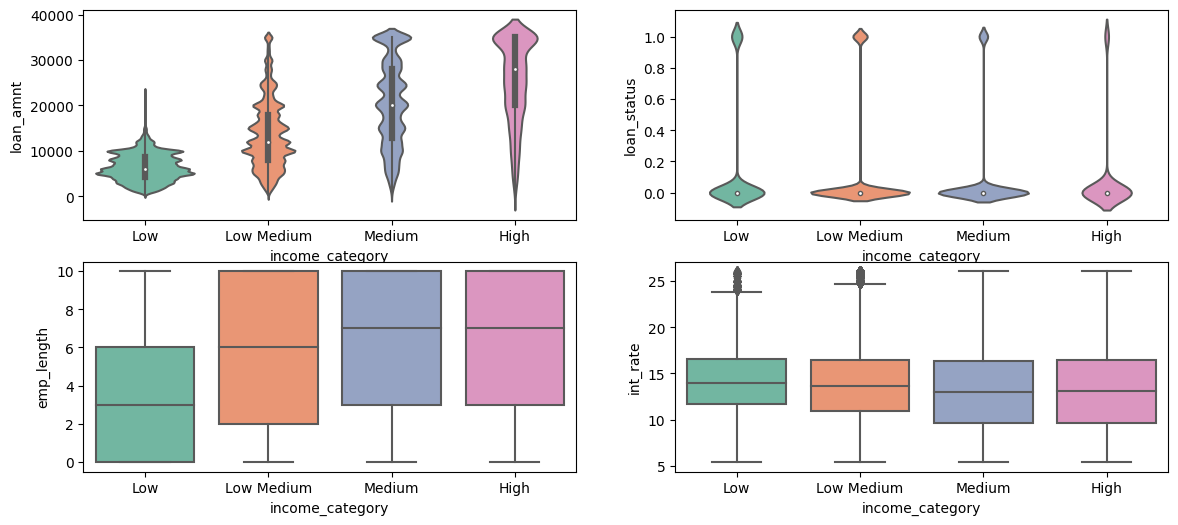

In [84]:
df['income_category'] = np.nan
lst = [df]
df.head()

for col in lst:
    col.loc[col['annual_inc'] <= 30000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 30000) & (col['annual_inc'] <= 100000), 'income_category'] = 'Low Medium'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 3000000), 'income_category'] = 'Medium'
    col.loc[(col['annual_inc'] > 300000) & (col['annual_inc'] <= 7500000), 'income_category'] = 'High'

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_status", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax4)

Nhận xét:
- Người ở nhóm thu nhập cao vay mượn nhiều hơn nhóm thu nhập thấp và trung bình thấp
- Người ở nhóm thu nhập cao và thấp dễ có xu hướng trở thành nợ xấu so với 2 nhóm còn lại
- Cũng dễ hiểu khi người đi vay có thu nhập thấp đồng nghĩa với việc thời gian lao động thấp và ngược lại
- Người ở thu nhập thấp có lãi suất lớn hơn nhưng cũng thiếu ổn định hơn so với những người ở nhóm thu nhập cao

In [86]:
df['year'] = pd.to_datetime(df['issue_d']).dt.year

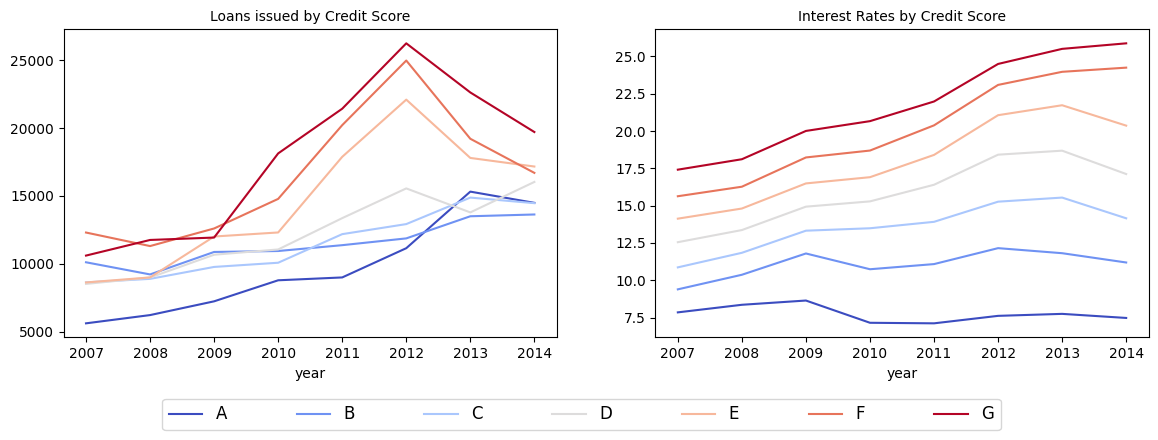

In [121]:
fig, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=10)

by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=10)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0.5, 1.0, 'Type of Loans by Grade')

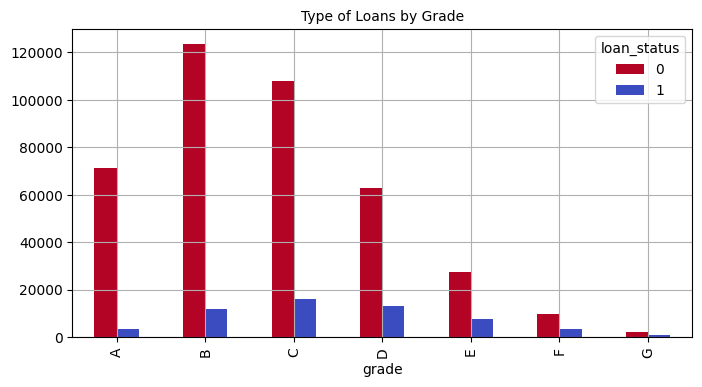

In [152]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

loans_by_grade = df.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked= False, colormap=cmap, ax=ax, grid=True)
ax.set_title('Type of Loans status by grade', fontsize=10)

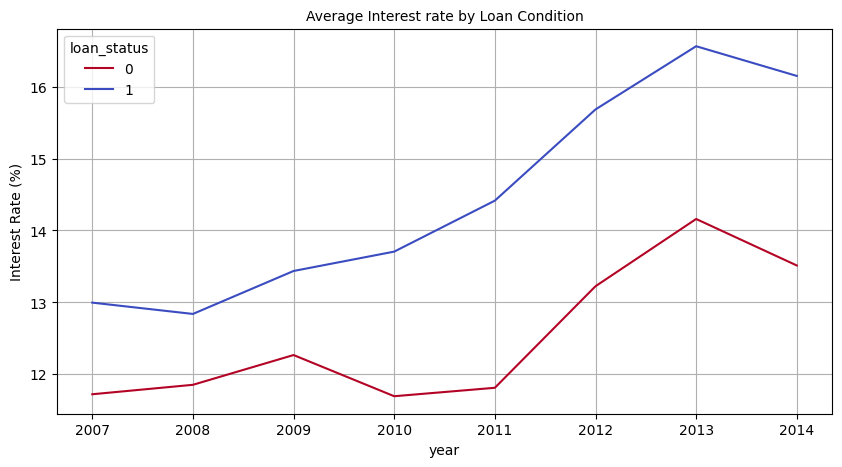

In [114]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

by_int_rate = df.groupby(['year', 'loan_status']).int_rate.mean()
by_int_rate.unstack().plot(ax=ax, colormap=cmap)
ax.set_title('Average Interest rate by Loan Condition', fontsize=10)
ax.set_ylabel('Interest Rate (%)', fontsize=10)

plt.grid()

Nhận xét:
- Người có grade thấp, khoản vay cao và lãi suất cũng cao
- Người có grade cao, lãi suất thấp
- Lãi suất ổn định trong giai đoạn 2007-2011 ở nhóm tín dụng tốt và đối với nhóm nợ xấu, lãi suất tăng trong giai đoạn dài hơn 2008 -2013
- Nhóm B,C,D có khả năng nợ xấu là cao nhất nhưng nhóm B cũng là nhóm có số lượng tín dụng đánh giá là tốt cao nhất

In [72]:
# Bining lại dữ liệu
input['int_rate'] = pd.cut(input['int_rate'], bins = [5.420, 7.484, 9.548, 11.612, 13.676, 15.74, 17.804, 19.868, 21.932, 26.06])
input['annual_inc'] = pd.cut(input['annual_inc'], bins = [1896, 30000, 100000, 300000, 7500000])
input['dti']  = pd.cut(input['dti'])
input['delinq_2yrs'] = pd.cut(input['delinq_2yrs'], bins = [0, 1, 29])
input['inq_last_6mths'] =pd.cut(input['inq_last_6mths'], bins = [0,0.9, 33])
input['mths_since_last_delinq'] = pd.cut(input['mths_since_last_delinq'], bins = [0, 0.9, 188])
input['open_acc'] =pd.cut(input['open_acc'], bins = [1,4,7, 10, 14, 84]) 
input['revol_util'] =pd.cut(input['revol_util'], bins = [0, 5, 20, 892.300])
input['total_acc'] = pd.cut(input['total_acc'])
input['out_prncp_inv'] =pd.cut(input['out_prncp_inv'])
input['total_rec_prncp'] = pd.cut(input['total_rec_prncp'])
input['total_rec_late_fee'] = pd.cut(input['total_rec_late_fee'])
input['recoveries'] = pd.cut(input['recoveries'])
input['delinq_pct'] = pd.cut(input['delinq_pct'], bins= [0, 1, 1300])
input['last_pymnt_amnt'] = pd.cut(input['last_pymnt_amnt'], bins=[0, 1500, 36234.44] )
input['loan_issue_m'] = pd.cut(input['loan_issue_m'], bins = [0,15,17,20,30,80,100])
input['cr_line_issue_m'] = pd.cut(input['cr_line_issue_m'], bins= [49, 125,250,400, 563.0 ])
input['acc_now_delinq'] = pd.cut(input['acc_now_delinq'])
input['total_installment'] = pd.cut(input['total_installment'])
input['collections_12_mths_ex_med'] =pd.cut(input['collections_12_mths_ex_med'])
input['pymnt_blance_rate']= pd.cut(input['pymnt_blance_rate'], bins = [0, 16, 45, 63.762])